In [20]:
import sys

lib_path = '/work-hmcomm/project/nedo2020_yokogawa/Git/yokogawa_knikaido/fastd-learning/src'
sys.path.insert(0, lib_path)

import numpy as np
import numpy # Since some code's been cut and pasted from elsewhere we need this too 
import os
import matplotlib.pyplot as plt
import glob
import pickle
import scipy.fftpack as spfft
from scipy import signal
import librosa
import librosa.display
from tqdm import tqdm
# import pywt
import cwt
import pandas as pd

In [21]:
from util.util import parse_audio_from_wav
from feature.feature_mfcc import FeatureMfcc

In [22]:
savepath = '/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/misc/PseudoAnomalyMixing_features/paperscale_scalogram/norm/'

fs = 96000

In [23]:
# wav_list = sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp02*anom09*left*-15*.wav'))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp02*anom09*left*-20*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp02*anom09*left*-25*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp03*anom09*left*-15*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp03*anom09*left*-20*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp03*anom09*left*-25*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp04*anom09*left*-15*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp04*anom09*left*-20*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp04*anom09*left*-25*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp05*anom09*left*-15*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp05*anom09*left*-20*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp05*anom09*left*-25*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp07*anom09*left*-15*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp07*anom09*left*-20*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp07*anom09*left*-25*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp08*anom09*left*-15*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp08*anom09*left*-20*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp08*anom09*left*-25*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp09*anom09*left*-15*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp09*anom09*left*-20*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp09*anom09*left*-25*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp10*anom09*left*-15*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp10*anom09*left*-20*.wav')))
# wav_list.extend(sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/anom_oneshot/*_5_*Exp10*anom09*left*-25*.wav')))
wav_list = sorted(glob.glob('/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/wav_mixing/norm/*_5_*.wav'))
# wav_list.pop(5)
# wav_list=wav_list[0]
len(wav_list)

800

In [24]:
start = 0
Fs = fs
step = int(96000*0.2)


# widths = np.exp(np.arange(1, 7, 0.1))
widths = 2 ** (np.arange(1, 65) / 4)

for i in range(len(wav_list)):
    
    cwt_ave_sum = []
    wavpath = wav_list[i]
    _, a =   parse_audio_from_wav(wavpath,sample_rate=fs)
#     wavdata = a[:,1]
    wavdata = a.reshape(-1)

    cwtmatr = cwt.step_cwt(wavdata, cwt.ricker, widths, step=step)
    log_cwtmatr = librosa.amplitude_to_db(cwtmatr, ref=np.max)
 
    print('**********'+wavpath[101:-4]+'**********')
#     savename = savepath + wavpath[101:-4] + '_scalogram_S200W400.npy' 
    savename = savepath + wavpath[93:-4] + '_scalogram_S200W400.npy' 
    np.save(savename, log_cwtmatr)
#     break

**********06_5_ZOOM-H06_Exp02_left_cut_00**********
**********06_5_ZOOM-H06_Exp02_left_cut_01**********
**********06_5_ZOOM-H06_Exp02_left_cut_02**********
**********06_5_ZOOM-H06_Exp02_left_cut_03**********
**********06_5_ZOOM-H06_Exp02_left_cut_04**********
**********06_5_ZOOM-H06_Exp02_left_cut_05**********
**********06_5_ZOOM-H06_Exp02_left_cut_06**********
**********06_5_ZOOM-H06_Exp02_left_cut_07**********
**********06_5_ZOOM-H06_Exp02_left_cut_08**********
**********06_5_ZOOM-H06_Exp02_left_cut_09**********
**********06_5_ZOOM-H06_Exp02_left_cut_10**********
**********06_5_ZOOM-H06_Exp02_left_cut_11**********
**********06_5_ZOOM-H06_Exp02_left_cut_12**********
**********06_5_ZOOM-H06_Exp02_left_cut_13**********
**********06_5_ZOOM-H06_Exp02_left_cut_14**********
**********06_5_ZOOM-H06_Exp02_left_cut_15**********
**********06_5_ZOOM-H06_Exp02_left_cut_16**********
**********06_5_ZOOM-H06_Exp02_left_cut_17**********
**********06_5_ZOOM-H06_Exp02_left_cut_18**********
**********06

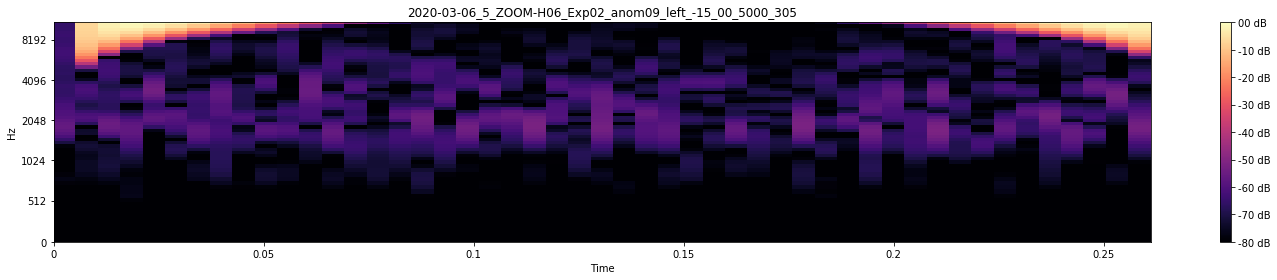

In [10]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(log_cwtmatr, sr=fs, x_axis='time', y_axis='mel')
plt.title(wavpath[101:-4])
plt.colorbar(format='%02.0f dB')
plt.tight_layout()

In [27]:
%%time

widths
Fs = fs
cwtmatr, freqs = pywt.cwt(wavdata_, widths, 'morl', sampling_period=1/Fs)
# cwtmatr += np.abs(np.min(cwtmatr))
np.set_printoptions(suppress=True)
print(freqs)
plt.figure(figsize=(12, 4))
# plt.imshow(np.abs(cwtmatr),  extent=[0, len(cwtmatr[0]), 0, len(widths)], cmap='PRGn', aspect='auto',
#             vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max()) 
cwtmatr.shape

[28694.59641137 24697.66801157 21257.47985665 18296.48247132
 15747.92840358 13554.36758913 11666.35229937 10041.32247985
  8642.64635226  7438.79465281  6402.62989266  5510.79461871
  4743.18488477  4082.49706398  3513.8377867   3024.38821087
  2603.11505691  2240.52189303  1928.43506469  1659.81944219
  1428.61983332  1229.62448582  1058.34760295   910.92822369
   784.04318808   674.83222584   580.83347953   499.92800881
   430.29202482   370.35577795   318.7681722    274.36630844
   236.14927014   203.25556044   174.94368212   150.57542263
   129.60146731   111.54901667    96.01112841    82.63754405]
CPU times: user 27min 22s, sys: 19min 19s, total: 46min 42s
Wall time: 13min 30s


(40, 28793856)

<Figure size 864x288 with 0 Axes>

In [28]:

win_length=0.4*fs
hop_length=0.2*fs
start = 0
cwtmatr = np.abs(cwtmatr)
cwt_ave = []

num_signal = int((len(cwtmatr[0]) - win_length) / hop_length) + 1
for i in tqdm(range(num_signal)):

    con_cwt = cwtmatr[:,int(start):int(start+win_length)]
    cwt_ave.append(np.array(np.average(con_cwt ,axis=1)))
#     if(i==0):
#         cwt_ave = np.average(con_cwt ,axis=1)
#     else:
#         cwt_ave = np.vstack([cwt_ave, np.average(con_cwt ,axis=1)])
#     start += hop_length
#     break

plt.figure(figsize=(12, 4))
# plt.imshow(cwt_ave.T,  extent=[0, len(cwt_ave.T[0]), 0, len(widths)], cmap='PRGn', aspect='auto',
#             vmax=abs(cwt_ave.T).max(), vmin=-abs(cwt_ave.T).max()) 
# cwt_ave.T[1]

100%|██████████| 1498/1498 [00:01<00:00, 1168.31it/s]


<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [13]:
cwt_ave = np.array(cwt_ave).T

array([[5.40299924e+06, 5.40299924e+06, 5.40299924e+06, ...,
        5.40299924e+06, 5.40299924e+06, 5.40299924e+06],
       [8.32306376e+06, 8.32306376e+06, 8.32306376e+06, ...,
        8.32306376e+06, 8.32306376e+06, 8.32306376e+06],
       [1.28420653e+07, 1.28420653e+07, 1.28420653e+07, ...,
        1.28420653e+07, 1.28420653e+07, 1.28420653e+07],
       ...,
       [2.53887318e+08, 2.53887318e+08, 2.53887318e+08, ...,
        2.53887318e+08, 2.53887318e+08, 2.53887318e+08],
       [2.41329505e+08, 2.41329505e+08, 2.41329505e+08, ...,
        2.41329505e+08, 2.41329505e+08, 2.41329505e+08],
       [2.55568819e+08, 2.55568819e+08, 2.55568819e+08, ...,
        2.55568819e+08, 2.55568819e+08, 2.55568819e+08]])

In [8]:
savename = savepath + wav_list[0][85:-4] + '_scalogram_S200W400_left.npy' 
savename

'/work-hmcomm/project/nedo2020_yokogawa/data/PilotPlant_Experiments_2020-0309/feature/extracted_on_2020-06-01_scalogram/2020-03-06_1_ZOOM-H06_Exp08_scalogram_S200W400_lety.npy'

In [10]:
    print('**********'+'**********')

********************
